In [1]:
import scanpy as sc
from genevector.data import GeneVectorDataset
from genevector.model import GeneVector
from genevector.embedding import GeneEmbedding, CellEmbedding

import os
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')

/Users/ceglian/gvenv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.0 pandas==1.5.1 scikit-learn==1.2.1 statsmodels==0.13.5 python-igraph==0.9.11 pynndescent==0.5.8


In [7]:

adata = sc.read("spectrum_cancer.h5ad")

/Users/ceglian/gvenv/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


# Load Cancer Cell Embedding

In [8]:
dataset = GeneVectorDataset(adata)

Loading Expression.
Indexing expression.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14085376/14085376 [00:07<00:00, 1846702.21it/s]


Finished.


In [10]:
embed = GeneEmbedding("embeddings/spectrum_cancer.vec", dataset,vector="average")

Loading average of 1st and 2nd weights.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:00<00:00, 4000671.50it/s]


normalizing counts per cell
    finished (0:00:00)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14085376/14085376 [00:22<00:00, 613502.06it/s]


Generating Cell Vectors.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 87229/87229 [00:06<00:00, 13400.21it/s]


Found 0 Cells with No Counts.
Finished.
Loading embedding in X_genevector.
Running Scanpy neighbors and umap.
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:14)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:53)


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/cegli

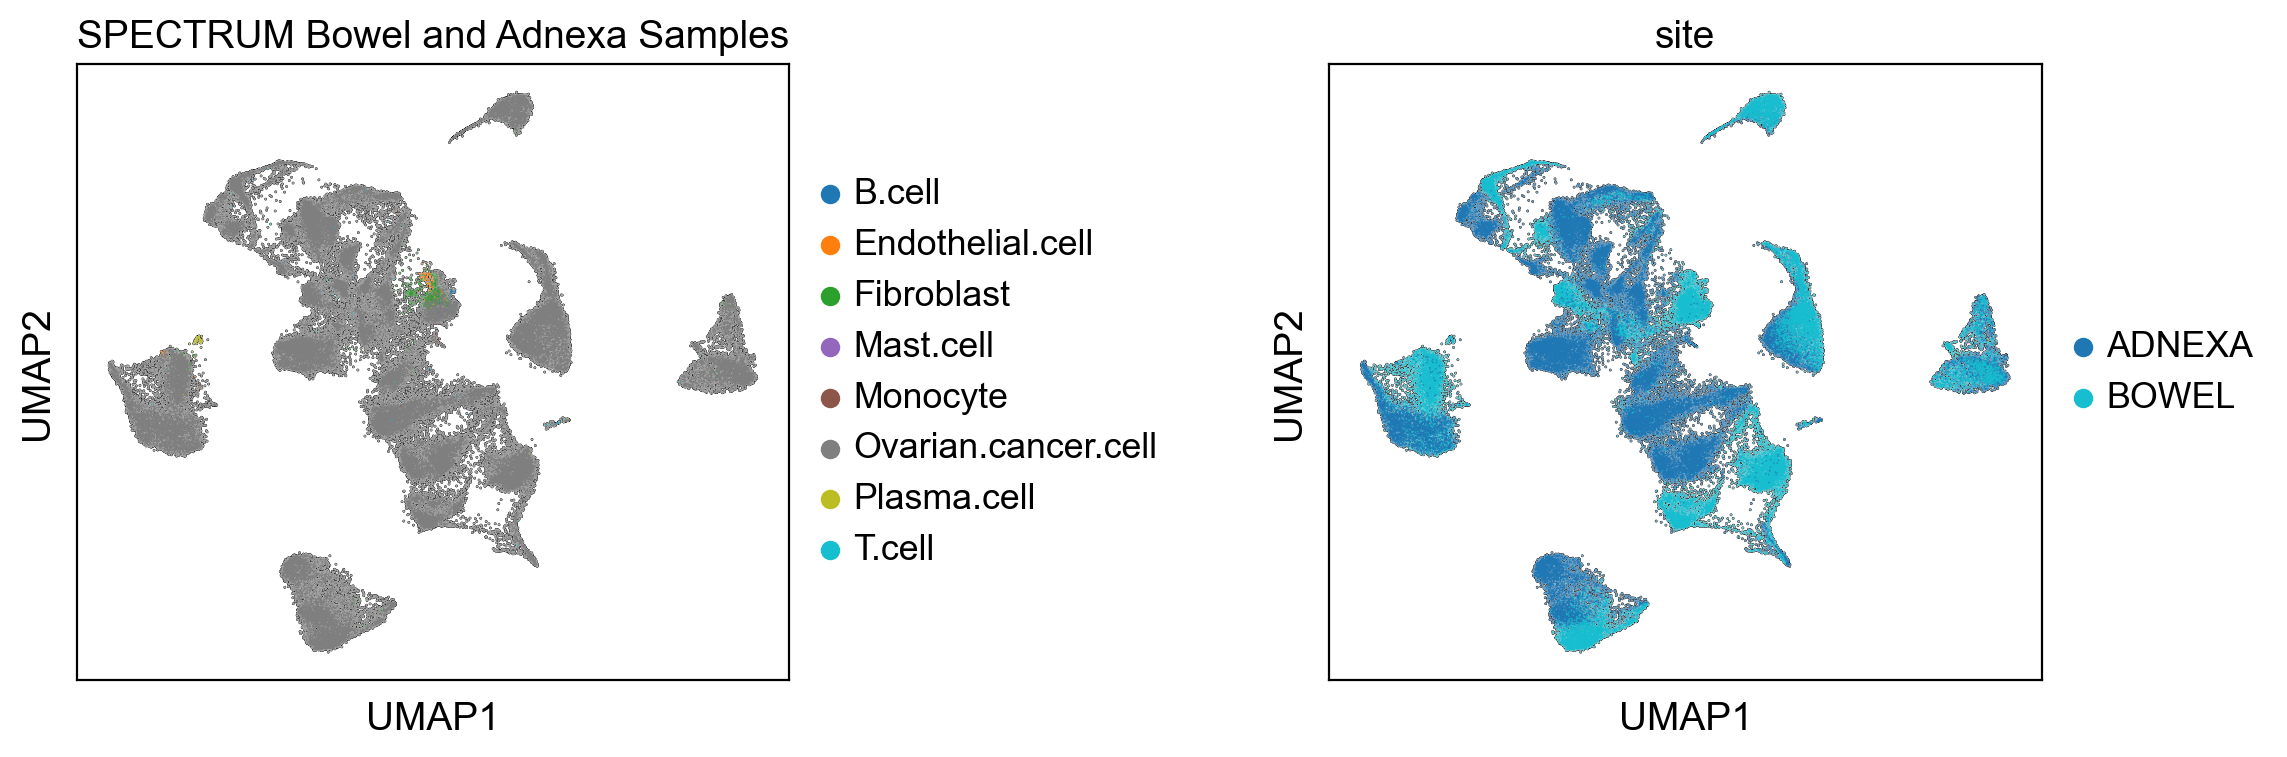

In [11]:
cembed = CellEmbedding(dataset, embed)
adata = cembed.get_adata()
sc.pl.umap(adata,palette="tab10",color=["author_cell_type","site"],
           title=["SPECTRUM Bowel and Adnexa Samples"],add_outline=True,wspace=0.6)

# Generate Metagenes

In [12]:
gdata = embed.get_adata(resolution=28.2)
metagenes = embed.get_metagenes(gdata)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Leiden clustering
    finished: found 312 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


In [13]:
embed.score_metagenes(adata, metagenes)

computing score '25_SCORE'
    finished: added
    '25_SCORE', score of gene set (adata.obs).
    245 total control genes are used. (0:00:00)
computing score '60_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '60_SCORE', score of gene set (adata.obs).
    293 total control genes are used. (0:00:00)
computing score '218_SCORE'
    finished: added
    '218_SCORE', score of gene set (adata.obs).
    96 total control genes are used. (0:00:00)
computing score '212_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '212_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '15_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '15_SCORE', score of gene set (adata.obs).
    341 total control genes are used. (0:00:00)
computing score '72_SCORE'
    finished: added
    '72_SCORE', score of gene set (adata.obs).
    244 total control genes are used. (0:00:00)
computing score '43_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '43_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '178_SCORE'
    finished: added
    '178_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '145_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '145_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '93_SCORE'
    finished: added
    '93_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '66_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '66_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '52_SCORE'
    finished: added
    '52_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '69_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '69_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '148_SCORE'
    finished: added
    '148_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '1_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '1_SCORE', score of gene set (adata.obs).
    331 total control genes are used. (0:00:00)
computing score '189_SCORE'
    finished: added
    '189_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '273_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '273_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '122_SCORE'
    finished: added
    '122_SCORE', score of gene set (adata.obs).
    195 total control genes are used. (0:00:00)
computing score '89_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '89_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '73_SCORE'
    finished: added
    '73_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '121_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '121_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '8_SCORE'
    finished: added
    '8_SCORE', score of gene set (adata.obs).
    242 total control genes are used. (0:00:00)
computing score '192_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '192_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '17_SCORE'
    finished: added
    '17_SCORE', score of gene set (adata.obs).
    294 total control genes are used. (0:00:00)
computing score '290_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '290_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '200_SCORE'
    finished: added
    '200_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '34_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '34_SCORE', score of gene set (adata.obs).
    194 total control genes are used. (0:00:00)
computing score '117_SCORE'
    finished: added
    '117_SCORE', score of gene set (adata.obs).
    145 total control genes are used. (0:00:00)
computing score '81_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '81_SCORE', score of gene set (adata.obs).
    245 total control genes are used. (0:00:00)
computing score '208_SCORE'
computing score '26_SCORE'
    finished: added
    '26_SCORE', score of gene set (adata.obs).
    189 total control genes are used. (0:00:00)
computing score '3_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '3_SCORE', score of gene set (adata.obs).
    238 total control genes are used. (0:00:00)
computing score '21_SCORE'
    finished: added
    '21_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '29_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '29_SCORE', score of gene set (adata.obs).
    241 total control genes are used. (0:00:00)
computing score '214_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '214_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '157_SCORE'
    finished: added
    '157_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '39_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '39_SCORE', score of gene set (adata.obs).
    243 total control genes are used. (0:00:00)
computing score '289_SCORE'
    finished: added
    '289_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '68_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '68_SCORE', score of gene set (adata.obs).
    145 total control genes are used. (0:00:00)
computing score '206_SCORE'
    finished: added
    '206_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '271_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '271_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '74_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '74_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '142_SCORE'
    finished: added
    '142_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '104_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '104_SCORE', score of gene set (adata.obs).
    245 total control genes are used. (0:00:00)
computing score '88_SCORE'
    finished: added
    '88_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '248_SCORE'
computing score '161_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '161_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '37_SCORE'
    finished: added
    '37_SCORE', score of gene set (adata.obs).
    195 total control genes are used. (0:00:00)
computing score '61_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '61_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '5_SCORE'
    finished: added
    '5_SCORE', score of gene set (adata.obs).
    337 total control genes are used. (0:00:00)
computing score '283_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '283_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '257_SCORE'
    finished: added
    '257_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '284_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '284_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '6_SCORE'
    finished: added
    '6_SCORE', score of gene set (adata.obs).
    145 total control genes are used. (0:00:00)
computing score '155_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '155_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '143_SCORE'
    finished: added
    '143_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '166_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '166_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '97_SCORE'
    finished: added
    '97_SCORE', score of gene set (adata.obs).
    243 total control genes are used. (0:00:00)
computing score '51_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '51_SCORE', score of gene set (adata.obs).
    241 total control genes are used. (0:00:00)
computing score '177_SCORE'
    finished: added
    '177_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '58_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '58_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '167_SCORE'
    finished: added
    '167_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '2_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '2_SCORE', score of gene set (adata.obs).
    145 total control genes are used. (0:00:00)
computing score '147_SCORE'
    finished: added
    '147_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '139_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '139_SCORE', score of gene set (adata.obs).
    294 total control genes are used. (0:00:00)
computing score '95_SCORE'
    finished: added
    '95_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '186_SCORE'
computing score '18_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '18_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '171_SCORE'
    finished: added
    '171_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '49_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '49_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '0_SCORE'
    finished: added
    '0_SCORE', score of gene set (adata.obs).
    339 total control genes are used. (0:00:00)
computing score '16_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '16_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '75_SCORE'
    finished: added
    '75_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '305_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '305_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '9_SCORE'
    finished: added
    '9_SCORE', score of gene set (adata.obs).
    390 total control genes are used. (0:00:00)
computing score '129_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '129_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '245_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '245_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '111_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '111_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '30_SCORE'
computing score '96_SCORE'
    finished: added
    '96_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '83_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '83_SCORE', score of gene set (adata.obs).
    144 total control genes are used. (0:00:00)
computing score '42_SCORE'
    finished: added
    '42_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '57_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '57_SCORE', score of gene set (adata.obs).
    244 total control genes are used. (0:00:00)
computing score '174_SCORE'
    finished: added
    '174_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '238_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '238_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '173_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '173_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '146_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '146_SCORE', score of gene set (adata.obs).
    243 total control genes are used. (0:00:00)
computing score '44_SCORE'
    finished: added
    '44_SCORE', score of gene set (adata.obs).
    291 total control genes are used. (0:00:00)
computing score '137_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '137_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '197_SCORE'
    finished: added
    '197_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '53_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '53_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '124_SCORE'
    finished: added
    '124_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '182_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '182_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '90_SCORE'
    finished: added
    '90_SCORE', score of gene set (adata.obs).
    243 total control genes are used. (0:00:00)
computing score '33_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '33_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '78_SCORE'
    finished: added
    '78_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '63_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '63_SCORE', score of gene set (adata.obs).
    145 total control genes are used. (0:00:00)
computing score '220_SCORE'
    finished: added
    '220_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '133_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '133_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '259_SCORE'
    finished: added
    '259_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '54_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '54_SCORE', score of gene set (adata.obs).
    294 total control genes are used. (0:00:00)
computing score '71_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '71_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '80_SCORE'
    finished: added
    '80_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '262_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '262_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '103_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(


    finished: added
    '103_SCORE', score of gene set (adata.obs).
    245 total control genes are used. (0:00:00)
computing score '20_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '20_SCORE', score of gene set (adata.obs).
    240 total control genes are used. (0:00:00)
computing score '116_SCORE'
    finished: added
    '116_SCORE', score of gene set (adata.obs).
    144 total control genes are used. (0:00:00)
computing score '162_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '162_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '59_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '59_SCORE', score of gene set (adata.obs).
    242 total control genes are used. (0:00:00)
computing score '202_SCORE'
    finished: added
    '202_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '82_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '82_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '14_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '14_SCORE', score of gene set (adata.obs).
    241 total control genes are used. (0:00:00)
computing score '105_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '105_SCORE', score of gene set (adata.obs).
    96 total control genes are used. (0:00:00)
computing score '303_SCORE'
computing score '221_SCORE'
    finished: added
    '221_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '285_SCORE'
computing score '64_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list 

    finished: added
    '64_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '277_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '277_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '281_SCORE'
computing score '28_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list 

    finished: added
    '28_SCORE', score of gene set (adata.obs).
    193 total control genes are used. (0:00:00)
computing score '250_SCORE'
computing score '79_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list 

    finished: added
    '79_SCORE', score of gene set (adata.obs).
    244 total control genes are used. (0:00:00)
computing score '310_SCORE'
computing score '46_SCORE'
    finished: added
    '46_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '40_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list 

    finished: added
    '40_SCORE', score of gene set (adata.obs).
    96 total control genes are used. (0:00:00)
computing score '109_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '109_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '50_SCORE'
    finished: added
    '50_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '48_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '48_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '41_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '41_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '299_SCORE'
    finished: added
    '299_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '107_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '107_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '136_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '136_SCORE', score of gene set (adata.obs).
    244 total control genes are used. (0:00:00)
computing score '31_SCORE'
    finished: added
    '31_SCORE', score of gene set (adata.obs).
    239 total control genes are used. (0:00:00)


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

computing score '254_SCORE'
    finished: added
    '254_SCORE', score of gene set (adata.obs).
    46 total control genes are used. (0:00:00)
computing score '240_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '240_SCORE', score of gene set (adata.obs).
    96 total control genes are used. (0:00:00)
computing score '86_SCORE'
computing score '55_SCORE'
    finished: added
    '55_SCORE', score of gene set (adata.obs).
    292 total control genes are used. (0:00:00)
computing score '246_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list 

    finished: added
    '246_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '253_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '253_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '38_SCORE'
    finished: added
    '38_SCORE', score of gene set (adata.obs).
    245 total control genes are used. (0:00:00)
computing score '236_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '236_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '13_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(


    finished: added
    '13_SCORE', score of gene set (adata.obs).
    243 total control genes are used. (0:00:00)
computing score '76_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '76_SCORE', score of gene set (adata.obs).
    243 total control genes are used. (0:00:00)
computing score '110_SCORE'
    finished: added
    '110_SCORE', score of gene set (adata.obs).
    46 total control genes are used. (0:00:00)
computing score '4_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '4_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '67_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '67_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '118_SCORE'
    finished: added
    '118_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '239_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '239_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '120_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '120_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '130_SCORE'
    finished: added
    '130_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '193_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '193_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '12_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '12_SCORE', score of gene set (adata.obs).
    293 total control genes are used. (0:00:00)
computing score '298_SCORE'
    finished: added
    '298_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '108_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '108_SCORE', score of gene set (adata.obs).
    243 total control genes are used. (0:00:00)
computing score '224_SCORE'
computing score '196_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

    finished: added
    '196_SCORE', score of gene set (adata.obs).
    144 total control genes are used. (0:00:00)
computing score '70_SCORE'
    finished: added
    '70_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '100_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '100_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '191_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '191_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '222_SCORE'
    finished: added
    '222_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '24_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '24_SCORE', score of gene set (adata.obs).
    192 total control genes are used. (0:00:00)
computing score '85_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '85_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '10_SCORE'
    finished: added
    '10_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '62_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '62_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '141_SCORE'
computing score '211_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

    finished: added
    '211_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '132_SCORE'
    finished: added
    '132_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '56_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '56_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '179_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '179_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '138_SCORE'
    finished: added
    '138_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '7_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '7_SCORE', score of gene set (adata.obs).
    388 total control genes are used. (0:00:00)
computing score '140_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '140_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '170_SCORE'
    finished: added
    '170_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '195_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '195_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '11_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '11_SCORE', score of gene set (adata.obs).
    240 total control genes are used. (0:00:00)
computing score '265_SCORE'
    finished: added
    '265_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '125_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '125_SCORE', score of gene set (adata.obs).
    194 total control genes are used. (0:00:00)
computing score '268_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '268_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '184_SCORE'
    finished: added
    '184_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '153_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '153_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '247_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '247_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '209_SCORE'
    finished: added
    '209_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '201_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '201_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '47_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '47_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '256_SCORE'
    finished: added
    '256_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '131_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '131_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '112_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '112_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '123_SCORE'
    finished: added
    '123_SCORE', score of gene set (adata.obs).
    194 total control genes are used. (0:00:00)
computing score '128_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '128_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '204_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '204_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '32_SCORE'
    finished: added
    '32_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '243_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '243_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '19_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(


    finished: added
    '19_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '152_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '152_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '84_SCORE'
    finished: added
    '84_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '286_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '286_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '251_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '251_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '119_SCORE'
    finished: added
    '119_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '176_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '176_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '213_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '213_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '216_SCORE'
    finished: added
    '216_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '45_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '45_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '258_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '258_SCORE', score of gene set (adata.obs).
    245 total control genes are used. (0:00:00)
computing score '165_SCORE'
    finished: added
    '165_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '92_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '92_SCORE', score of gene set (adata.obs).
    145 total control genes are used. (0:00:00)
computing score '199_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(


    finished: added
    '199_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '278_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '278_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '158_SCORE'
    finished: added
    '158_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

computing score '102_SCORE'
    finished: added
    '102_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '304_SCORE'
computing score '210_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

    finished: added
    '210_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '159_SCORE'
    finished: added
    '159_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '308_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '308_SCORE', score of gene set (adata.obs).
    48 total control genes are used. (0:00:00)
computing score '65_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '65_SCORE', score of gene set (adata.obs).
    243 total control genes are used. (0:00:00)
computing score '115_SCORE'
    finished: added
    '115_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '194_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '194_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '228_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '228_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '181_SCORE'
    finished: added
    '181_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '77_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '77_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '35_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '35_SCORE', score of gene set (adata.obs).
    245 total control genes are used. (0:00:00)
computing score '22_SCORE'
    finished: added
    '22_SCORE', score of gene set (adata.obs).
    194 total control genes are used. (0:00:00)
computing score '276_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '276_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '217_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '217_SCORE', score of gene set (adata.obs).
    195 total control genes are used. (0:00:00)
computing score '101_SCORE'
    finished: added
    '101_SCORE', score of gene set (adata.obs).
    46 total control genes are used. (0:00:00)
computing score '232_SCORE'
computing score '293_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '293_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '149_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '149_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '113_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '113_SCORE', score of gene set (adata.obs).
    245 total control genes are used. (0:00:00)
computing score '175_SCORE'
    finished: added
    '175_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '280_SCORE'
computing score '27_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '27_SCORE', score of gene set (adata.obs).
    391 total control genes are used. (0:00:00)
computing score '183_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '183_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '226_SCORE'
    finished: added
    '226_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '23_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '23_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '255_SCORE'
computing score '244_SCORE'
computing score '36_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

    finished: added
    '36_SCORE', score of gene set (adata.obs).
    292 total control genes are used. (0:00:00)
computing score '185_SCORE'
    finished: added
    '185_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '135_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '135_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '106_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '106_SCORE', score of gene set (adata.obs).
    195 total control genes are used. (0:00:00)
computing score '225_SCORE'
    finished: added
    '225_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '264_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '264_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '154_SCORE'
computing score '151_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

    finished: added
    '151_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '198_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '198_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '223_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '223_SCORE', score of gene set (adata.obs).
    195 total control genes are used. (0:00:00)
computing score '150_SCORE'
    finished: added
    '150_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '127_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '127_SCORE', score of gene set (adata.obs).
    244 total control genes are used. (0:00:00)
computing score '205_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '205_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '219_SCORE'
    finished: added
    '219_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '274_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '274_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '231_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '231_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '160_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '160_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '282_SCORE'
computing score '99_SCORE'
    finished: added
    '99_SCORE', score of gene set (adata.obs).
    244 total control genes are used. (0:00:00)
computing score '300_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list 

    finished: added
    '300_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '260_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '260_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '267_SCORE'
computing score '91_SCORE'
    finished: added
    '91_SCORE', score of gene set (adata.obs).
    245 total control genes are used. (0:00:00)
computing score '163_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list 

    finished: added
    '163_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '164_SCORE'
computing score '227_SCORE'
computing score '180_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

    finished: added
    '180_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '114_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '114_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '249_SCORE'
    finished: added
    '249_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '301_SCORE'
computing score '87_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '87_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '297_SCORE'
computing score '126_SCORE'
computing score '292_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

    finished: added
    '292_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '252_SCORE'
    finished: added
    '252_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '270_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '270_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '203_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '203_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '188_SCORE'
    finished: added
    '188_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '134_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '134_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '295_SCORE'
computing score '168_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

    finished: added
    '168_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '187_SCORE'
    finished: added
    '187_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '190_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '190_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '169_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '169_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '279_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '279_SCORE', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score '235_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '235_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '94_SCORE'
    finished: added
    '94_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '237_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '237_SCORE', score of gene set (adata.obs).
    146 total control genes are used. (0:00:00)
computing score '233_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '233_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '215_SCORE'
    finished: added
    '215_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '302_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '302_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '288_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '288_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '241_SCORE'
    finished: added
    '241_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '291_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '291_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '98_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '98_SCORE', score of gene set (adata.obs).
    97 total control genes are used. (0:00:00)
computing score '156_SCORE'
    finished: added
    '156_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '229_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '229_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '306_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '306_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '144_SCORE'
    finished: added
    '144_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '242_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '242_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '207_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(


    finished: added
    '207_SCORE', score of gene set (adata.obs).
    147 total control genes are used. (0:00:00)
computing score '230_SCORE'
computing score '296_SCORE'
computing score '234_SCORE'
computing score '266_SCORE'
computing score '172_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

    finished: added
    '172_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '269_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    '269_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '307_SCORE'
computing score '263_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[str(p)+"_SCORE"] = 0.
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list 

    finished: added
    '263_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '261_SCORE'
    finished: added
    '261_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '294_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

    finished: added
    '294_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '287_SCORE'
computing score '272_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/genevector-0.1.0-py3.9.egg/genevector/embedding.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

    finished: added
    '272_SCORE', score of gene set (adata.obs).
    98 total control genes are used. (0:00:00)
computing score '275_SCORE'
    finished: added
    '275_SCORE', score of gene set (adata.obs).
    49 total control genes are used. (0:00:00)
computing score '311_SCORE'
computing score '309_SCORE'


/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[score_name] = pd.Series(
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/ceglian/gvenv/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

# Generate Vectors for each Site

In [14]:
subad = adata[adata.obs["site"]=="ADNEXA"]
subbo = adata[adata.obs["site"]=="BOWEL"]

In [15]:
import matplotlib.pyplot as plt
mapped_components = dict(zip(list(cembed.data.keys()),cembed.matrix))
comps = collections.defaultdict(list)
for bc,x,y in zip(annotated_adata.obs.index,annotated_adata.obs["site"],annotated_adata.obs["genevector"]):
    comps[x +"-"+ y].append(mapped_components[bc])
vectors = dict()
mean_vecs = []
for x, vec in comps.items():
    print(x)
    ovecs = []
    vec = numpy.mean(vec,axis=0)
    for oph, ovec in comps.items():
        for o in ovec:
            ovecs.append(o)
    aovec = numpy.average(ovecs,axis=0)
    vector = numpy.subtract(vec,aovec)
    vector = numpy.subtract(vector,cembed.dataset_vector)
    vectors[x] = vector
markers = dict()
fig,ax = plt.subplots(1,12,figsize=(25,6))
i = 0
for x, mvec in vectors.items():
    ct_sig = embed.get_similar_genes(mvec)[:25]
    sns.barplot(data=ct_sig,y="Gene",x="Similarity",palette="Dark2",ax=ax[i])
    ax[i].set_title(x)
    i += 1
fig.tight_layout()

NameError: name 'collections' is not defined

In [ ]:
import matplotlib.pyplot as plt
mapped_components = dict(zip(list(cembed.data.keys()),cembed.matrix))
comps = collections.defaultdict(list)
for bc,x in zip(adata.obs.index,adata.obs["site"]):
    comps[x].append(mapped_components[bc])
vectors = dict()
mean_vecs = []
for x, vec in comps.items():
    print(x)
    ovecs = []
    vec = numpy.mean(vec,axis=0)
    for oph, ovec in comps.items():
        for o in ovec:
            ovecs.append(o)
    aovec = numpy.average(ovecs,axis=0)
    vector = numpy.subtract(vec,aovec)
    vector = numpy.subtract(vector,cembed.dataset_vector)
    vectors[x] = vector
markers = dict()
fig,ax = plt.subplots(1,2,figsize=(8,6))
i = 0
for x, mvec in vectors.items():
    ct_sig = embed.get_similar_genes(mvec)[:25]
    sns.barplot(data=ct_sig,y="Gene",x="Similarity",palette="Dark2",ax=ax[i])
    ax[i].set_title(x)
    i += 1
fig.tight_layout()

# Find Metagenes similar to Adnexa - Bowel (Vector Arithmetic)

In [ ]:
from scipy.spatial import distance
res = numpy.subtract(vectors["ADNEXA-Ovarian.cancer.cell"],vectors["BOWEL-Ovarian.cancer.cell"])
mgs_down = dict()
distances = dict()
for mg, genes in metagenes.items():
    mgvec = embed.generate_vector(genes)
    dist = 1.0 - distance.cosine(res,mgvec)
    distances[mg] = dist
sorted_x = list(reversed(sorted(distances.items(), key=lambda kv: kv[1])))
for mg, dist in sorted_x[:5]:
    print(mg, dist, metagenes[mg])
    mgs_down[mg] = metagenes[mg]

# Find Metagenes similar to Bowel - Adnexa

In [ ]:
from scipy.spatial import distance
res = numpy.subtract(vectors["BOWEL-Ovarian.cancer.cell"],vectors["ADNEXA-Ovarian.cancer.cell"])
mgs_up = dict()
distances = dict()
for mg, genes in metagenes.items():
    mgvec = embed.generate_vector(genes)
    dist = 1.0 - distance.cosine(res,mgvec)
    distances[mg] = dist
sorted_x = list(reversed(sorted(distances.items(), key=lambda kv: kv[1])))
for mg, dist in sorted_x[:5]:
    print(mg, dist, metagenes[mg])
    mgs_up[mg] = metagenes[mg]

# GSEA Enrichment of Metagenes

In [ ]:
import pandas
sns.set(font_scale=0.9)
import gseapy as gp
enrc = collections.defaultdict(dict)
terms = set()
mgs = []
for mg, genes in mgs_up.items():
    enr = gp.enrichr(gene_list=genes,
                     gene_sets=['MSigDB_Hallmark_2020'],
                     organism='Human', 
                     description='test_name',
                     outdir='test/enrichr_kegg',
                     cutoff=0.001 
                    )    
    mgs.append(mg)
    for x,y in zip(enr.res2d["Term"],enr.res2d["Combined Score"]):
        if y > 0:
            enrc[mg][x] = y
            terms.add(x)
mat = []
for term in terms:
    row = []
    for mg in mgs:
        if term in enrc[mg]:
            row.append(enrc[mg][term])
        else:
            row.append(0.0)
    mat.append(row)
print(mat)
df = pandas.DataFrame(numpy.array(mat),columns=mgs,index=terms).T
fig, ax = plt.subplots(1,1,figsize=(12,7))
sns.heatmap(df,yticklabels=True,xticklabels=True,ax=ax, vmax=500,cmap="viridis")
ax.set_title("Hallmark Combined Enrichment Score")
fig.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
import collections
import numpy
import seaborn as sns
import pandas
sns.set(font_scale=0.9)
import gseapy as gp
for p in set(adata.obs["patient"]):
    sub = adata[adata.obs["patient"]==p]
    mapped_components = dict(zip(list(cembed.data.keys()),cembed.matrix))
    comps = collections.defaultdict(list)
    for bc,x in zip(sub.obs.index,sub.obs["site"]):
        comps[x].append(mapped_components[bc])
    vectors = dict()
    mean_vecs = []
    for x, vec in comps.items():
        print(x)
        ovecs = []
        vec = numpy.mean(vec,axis=0)
        for oph, ovec in comps.items():
            for o in ovec:
                ovecs.append(o)
        aovec = numpy.average(ovecs,axis=0)
        vector = numpy.subtract(vec,aovec)
        vector = numpy.subtract(vector,cembed.dataset_vector)
        vectors[x] = vector
    res = numpy.subtract(vectors["BOWEL"],vectors["ADNEXA"])
    mgs_up = dict()
    distances = dict()
    for mg, genes in metagenes.items():
        mgvec = embed.generate_vector(genes)
        dist = 1.0 - distance.cosine(res,mgvec)
        distances[mg] = dist
    sorted_x = list(reversed(sorted(distances.items(), key=lambda kv: kv[1])))
    for mg, dist in sorted_x[:15]:
        print(mg, dist, metagenes[mg])
        mgs_up[mg] = metagenes[mg]

    enrc = collections.defaultdict(dict)
    terms = set()
    mgs = []
    for mg, genes in mgs_up.items():
        enr = gp.enrichr(gene_list=genes,
                        gene_sets=['MSigDB_Hallmark_2020'],
                        organism='Human', 
                        description='test_name',
                        outdir='test/enrichr_kegg',
                        cutoff=0.001 
                        )    
        mgs.append(mg)
        for x,y in zip(enr.res2d["Term"],enr.res2d["Combined Score"]):
            if y > 0:
                enrc[mg][x] = y
                terms.add(x)
    mat = []
    for term in terms:
        row = []
        for mg in mgs:
            if term in enrc[mg]:
                row.append(enrc[mg][term])
            else:
                row.append(0.0)
        mat.append(row)
    print(mat)
    df = pandas.DataFrame(numpy.array(mat),columns=mgs,index=list(terms)).T
    fig, ax = plt.subplots(1,1,figsize=(12,7))
    sns.heatmap(df,yticklabels=True,xticklabels=True,ax=ax, vmax=500,cmap="viridis")
    ax.set_title("Hallmark Combined Enrichment Score - {}".format(p))
    fig.tight_layout()